In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import spacy as spc
import re


In [2]:
nlp = spc.load('en_core_web_sm')

In [3]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')
data_sample = pd.read_csv('sample_submission.csv')

In [8]:
data_sample.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [9]:
data_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [13]:
blanks = []

for i,se,ms,twid in data_train.itertuples():
    if ms.isspace():
        blanks.append(i)
        
                  
                       

In [15]:
blanks

[]

In [8]:
df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]},
                   index=['dog', 'hawk'])




In [9]:
 df

,num_legs,num_wings
dog,4,0
hawk,2,2


In [10]:
 for row in df.itertuples():
         print(row)

Pandas(Index='dog', num_legs=4, num_wings=0)
Pandas(Index='hawk', num_legs=2, num_wings=2)


In [34]:
data_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
# checking for null values
data_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [10]:
# check out the number of classes in the response variable
data_train['sentiment'].nunique()

4

In [11]:
# response variable is non binary
data_train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [12]:
import matplotlib.pyplot as plt

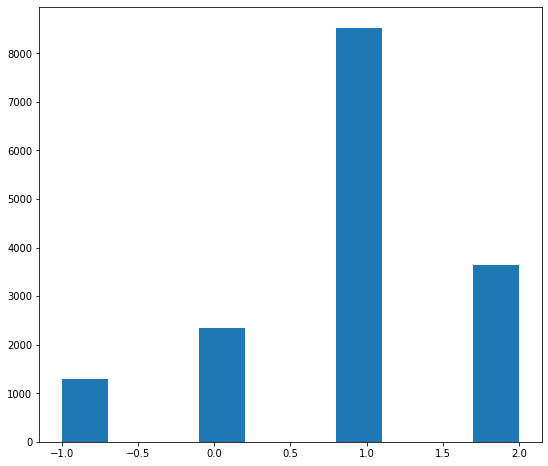

In [13]:
plt.figure(figsize = [9.0,8.0])
plt.hist(data_train['sentiment'])
plt.show()

In [10]:
data_test = pd.read_csv('test.csv')

In [79]:
matches = re.findall('https',data_train['message'][0])

In [80]:
matches

['https']

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [12]:
data_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [13]:
X_train = data_train['message']
y_train = data_train['sentiment']
X_test = data_test['message']

In [14]:
#spliting the X_train 'message' and y_train 'sentiment' features
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train,y_train, test_size = 0.2)


In [15]:
X_train.shape

(15819,)

In [16]:
X_train2.shape

(12655,)

# Building Linear Support Vector Model

In [17]:
#importing pipeline and feature extraction classes to create their intsances
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [18]:
# create an intance of the text features vectorizer and counter 
vectorizer = TfidfVectorizer()

In [19]:
# creating an instance of the pipeline
text_v = Pipeline([('tfidf',TfidfVectorizer()),('Lsvc',LinearSVC())])

In [20]:
#fitting the data to the pipeline 
text_v.fit(X_train2,y_train2)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Lsvc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
              

In [21]:
#creating prediction variable and prediction
prediction = text_v.predict(X_test2)

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [23]:
print(confusion_matrix(y_test2,prediction))

[[ 120   43   87   11]
 [  18  184  187   54]
 [  21   69 1451  169]
 [   9   12  124  605]]


In [24]:
print(classification_report(y_test2,prediction))

              precision    recall  f1-score   support

          -1       0.71      0.46      0.56       261
           0       0.60      0.42      0.49       443
           1       0.78      0.85      0.82      1710
           2       0.72      0.81      0.76       750

    accuracy                           0.75      3164
   macro avg       0.70      0.63      0.66      3164
weighted avg       0.74      0.75      0.74      3164



In [25]:
print(accuracy_score(y_test2,prediction))

0.7458912768647282


# Testing for submission

In [26]:
X_data_test = data_test['message']

In [38]:
sentiment = text_v.predict(X_data_test)
sentiment

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [43]:
df = pd.DataFrame(data = (data_test['tweetid'],sentiment))


In [46]:
df = df.T

In [48]:
df.rename(columns = {'Unnamed 0':'sentiment'}, inplace = True) 

In [49]:
df

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [54]:
df.to_csv(r'submission2.csv', index = False)

# Testing for submission 2

In [50]:
import pickle

model_save_path = "cl_text_v.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(text_v,file)

In [4]:
import pickle
model_load_path ="cl2_text_v.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

In [33]:
y_pred = unpickled_model.predict(X_test2)

In [35]:
print(accuracy_score(y_test2,y_pred))

0.9418457648546145


In [36]:
print(classification_report(y_test2,y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.84      0.90       261
           0       0.93      0.85      0.89       443
           1       0.94      0.97      0.96      1710
           2       0.94      0.96      0.95       750

    accuracy                           0.94      3164
   macro avg       0.94      0.91      0.92      3164
weighted avg       0.94      0.94      0.94      3164



In [37]:
print(confusion_matrix(y_test2,y_pred))

[[ 220   14   23    4]
 [   2  377   51   13]
 [   6   10 1663   31]
 [   0    5   25  720]]


In [26]:
X_data_test = data_test['message']

In [27]:
sentiment = unpickled_model.predict(X_data_test)
sentiment

array([1, 1, 1, ..., 2, 0, 1], dtype=int64)

In [28]:
df = pd.DataFrame(data = (data_test['tweetid'],sentiment))

In [29]:
df = df.T

In [30]:
df.rename(columns = {'Unnamed 0':'sentiment'}, inplace = True) 

In [32]:
df

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,2
10544,867455,0


In [38]:
df.to_csv(r'submission2.csv', index = False)

In [127]:
predictions3.shape 
predictions3=text_v.predict(X_test)

(10546,)

In [82]:
# importing metrics to measure model performance
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report

In [83]:
#create confusion metrics of ground truth and predicted values
cm = metrics.confusion_matrix(y_test2,prediction)

In [171]:
# print confusion matrix
print(cm)


[[  42   15  174   15]
 [   2  164  302   19]
 [   0   29 1555  111]
 [   0    1  232  503]]


In [172]:
# print the classification report
print(metrics.classification_report(y_test2,prediction))

              precision    recall  f1-score   support

          -1       0.66      0.50      0.57       246
           0       0.67      0.44      0.53       487
           1       0.79      0.87      0.83      1695
           2       0.76      0.81      0.79       736

    accuracy                           0.76      3164
   macro avg       0.72      0.65      0.68      3164
weighted avg       0.75      0.76      0.75      3164



In [173]:
# print the accuracy score
print(metrics.accuracy_score(y_test2,prediction))

0.761378002528445


In [180]:
# tweaked the C parameter to 0.5
text_v2 = Pipeline([('tfidf',TfidfVectorizer()),
                    ('Lsvc',LinearSVC(C = 0.5,penalty = 'l2', 
                    multi_class='crammer_singer'))])

In [181]:
text_v2.fit(X_train2,y_train2)

C:\Users\xxx\anaconda3\Anaconda364bit\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('Lsvc',
                 LinearSVC(C=0.5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
              

In [182]:
predictions = text_v2.predict(X_test2)

# Measuring the LSVC Model

In [183]:
print(metrics.classification_report(y_test2,predictions))

              precision    recall  f1-score   support

          -1       0.68      0.48      0.56       246
           0       0.72      0.39      0.50       487
           1       0.77      0.88      0.83      1695
           2       0.75      0.81      0.78       736

    accuracy                           0.76      3164
   macro avg       0.73      0.64      0.67      3164
weighted avg       0.75      0.76      0.74      3164



In [184]:
print(metrics.accuracy_score(y_test2,predictions))

0.7588495575221239


In [185]:
#printing both LSVC accuracy_score
print(metrics.accuracy_score(y_test2,predictions),metrics.accuracy_score(y_test2,prediction))

0.7588495575221239 0.761378002528445


In [186]:
#printing both LSVC classification reports
print(metrics.classification_report(y_test2,predictions),metrics.classification_report(y_test2,prediction))

              precision    recall  f1-score   support

          -1       0.68      0.48      0.56       246
           0       0.72      0.39      0.50       487
           1       0.77      0.88      0.83      1695
           2       0.75      0.81      0.78       736

    accuracy                           0.76      3164
   macro avg       0.73      0.64      0.67      3164
weighted avg       0.75      0.76      0.74      3164
               precision    recall  f1-score   support

          -1       0.66      0.50      0.57       246
           0       0.67      0.44      0.53       487
           1       0.79      0.87      0.83      1695
           2       0.76      0.81      0.79       736

    accuracy                           0.76      3164
   macro avg       0.72      0.65      0.68      3164
weighted avg       0.75      0.76      0.75      3164



# Random forests

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


In [59]:
text_v3 = Pipeline([('tfidf',TfidfVectorizer()),('RandomC',classifier)])

In [60]:
text_v3.fit(X_train2,y_train2)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [61]:
prediction4 = text_v3.predict(X_test2)

In [62]:
metrics.accuracy_score(y_test2,prediction4)

0.7092288242730721

In [63]:
print(metrics.classification_report(y_test2,prediction4))

              precision    recall  f1-score   support

          -1       0.97      0.15      0.25       261
           0       0.72      0.31      0.43       443
           1       0.69      0.89      0.78      1710
           2       0.75      0.72      0.73       750

    accuracy                           0.71      3164
   macro avg       0.78      0.52      0.55      3164
weighted avg       0.73      0.71      0.68      3164



In [64]:
cm2 = confusion_matrix(y_test2,prediction4)
print(cm2)


[[  38   16  196   11]
 [   1  136  283   23]
 [   0   33 1528  149]
 [   0    5  203  542]]
